In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

# kNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
def setcolor(s):    # s: Series
    color = []
    colors = [ 'b','g', 'r']
    for i in s.values:
        color.append(colors[i])
    return color

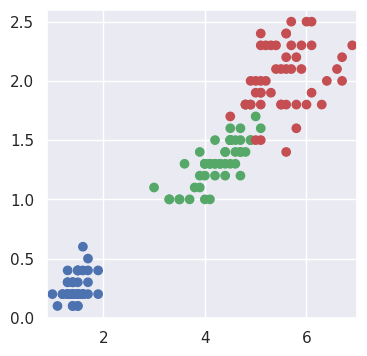

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color = setcolor(df['target']))

plt.xlim(df['petal length (cm)'].min()-0.1, 
         df['petal length (cm)'].max()+0.1)

plt.ylim(df['petal width (cm)'].min()-0.1, 
         df['petal width (cm)'].max()+0.1)
plt.show()

In [ ]:
df['target'].shape

(150,)

## 자료 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.iloc[:, :4].to_numpy()
scaler.fit(data)
s = scaler.transform(data)

In [ ]:
type(s), s.shape

(numpy.ndarray, (150, 4))

In [ ]:
sdf = pd.DataFrame(s, columns=df.columns[:-1])
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
sdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
sdf['target'] = df.target
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


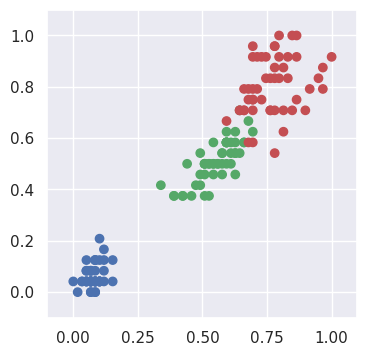

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x=sdf['petal length (cm)'], 
            y=sdf['petal width (cm)'], 
            color = setcolor(sdf['target']))

plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()

In [ ]:
# 자료 분리 및 성능평가 함수  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sdf.iloc[:,:-1], 
                                                    sdf['target'], 
                                                    test_size=0.33)
type(x_train), x_train.shape, type(y_train), y_train.shape

(pandas.core.frame.DataFrame, (100, 4), pandas.core.series.Series, (100,))

In [ ]:
sdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [ ]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
18,0.388889,0.750000,0.118644,0.083333
108,0.666667,0.208333,0.813559,0.708333
114,0.416667,0.333333,0.694915,0.958333
47,0.083333,0.500000,0.067797,0.041667
102,0.777778,0.416667,0.830508,0.833333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#k=5
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
model.n_features_in_

4

In [ ]:
model.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [ ]:
model.classes_

array([0, 1, 2])

In [ ]:
y_test

51     1
74     1
44     0
61     1
67     1
38     0
69     1
36     0
106    2
118    2
14     0
62     1
21     0
63     1
104    2
92     1
42     0
24     0
22     0
10     0
126    2
35     0
78     1
53     1
1      0
140    2
66     1
127    2
68     1
100    2
25     0
60     1
29     0
111    2
144    2
54     1
85     1
19     0
50     1
46     0
116    2
77     1
4      0
58     1
86     1
149    2
56     1
11     0
41     0
81     1
Name: target, dtype: int64

In [ ]:
print(y_test.values)

[1 1 0 1 1 0 1 0 2 2 0 1 0 1 2 1 0 0 0 0 2 0 1 1 0 2 1 2 1 2 0 1 0 2 2 1 1
 0 1 0 2 1 0 1 1 2 1 0 0 1]


In [ ]:
pred = model.predict(x_test)
print(pred)

[1 1 0 1 1 0 1 0 1 2 0 1 0 1 2 1 0 0 0 0 2 0 1 1 0 2 1 2 1 2 0 1 0 2 2 1 1
 0 1 0 2 2 0 1 1 2 1 0 0 1]


In [ ]:
type(pred), pred.shape

(numpy.ndarray, (50,))

In [ ]:
print(confusion_matrix(y_test, pred))

[[18  0  0]
 [ 0 20  1]
 [ 0  1 10]]


In [ ]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, linewidth=0.5 )
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

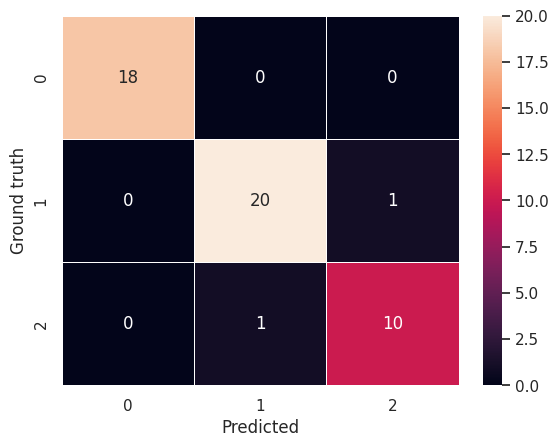

In [ ]:
dispConfusionMatrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      0.95      0.95        21
           2       0.91      0.91      0.91        11

    accuracy                           0.96        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.96      0.96      0.96        50



In [ ]:
y_test != pred

51     False
74     False
44     False
61     False
67     False
38     False
69     False
36     False
106     True
118    False
14     False
62     False
21     False
63     False
104    False
92     False
42     False
24     False
22     False
10     False
126    False
35     False
78     False
53     False
1      False
140    False
66     False
127    False
68     False
100    False
25     False
60     False
29     False
111    False
144    False
54     False
85     False
19     False
50     False
46     False
116    False
77      True
4      False
58     False
86     False
149    False
56     False
11     False
41     False
81     False
Name: target, dtype: bool

In [ ]:
y_test[y_test != pred]

106    2
77     1
Name: target, dtype: int64

In [ ]:
(y_test[y_test != pred]).index

Int64Index([106, 77], dtype='int64')

In [ ]:
indices = np.where(y_test != pred)[0]
indices    ## 결과의 위치이기 때문에 사용할 수 없다!

array([ 8, 41])

In [ ]:
edf = df.iloc[ (y_test[y_test != pred]).index, :]
edf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
106,4.9,2.5,4.5,1.7,2
77,6.7,3.0,5.0,1.7,1


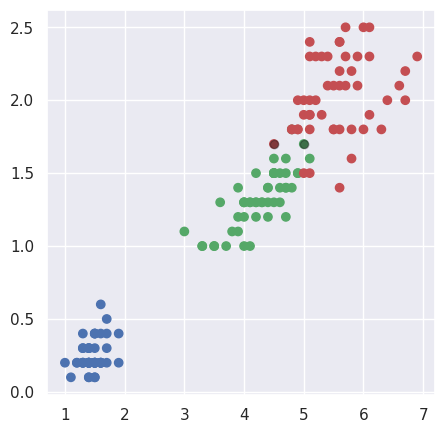

In [ ]:
# 데이터 & 예측결과 표시하기
plt.figure(figsize=(5,5))

plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color = setcolor(df['target']), 
            alpha=1) #불투명

plt.scatter(x=edf['petal length (cm)'], 
            y=edf['petal width (cm)'], 
            color = 'k', 
            alpha=0.4)  
plt.show()

# SVM

In [ ]:
x = np.array([ [0,0], 
               [1,1] ])
y = np.array( [0, 1] )

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x, y)

LinearSVC()

In [ ]:
test_data = np.array([[0.7,0.6], 
                      [0.3,0.2]])
pred = model.predict(test_data)
pred

array([1, 0])

In [ ]:
print(model.coef_)
print(model.intercept_)

[[0.58822994 0.58822994]]
[-0.47057486]


In [ ]:
c = model.coef_[0]
i = model.intercept_[0]
w = -c[0] / c[1]
b = - i/c[1] 
print('기울기:', w, '\ny절편:', b)

기울기: -1.0 
y절편: 0.7999845354335795


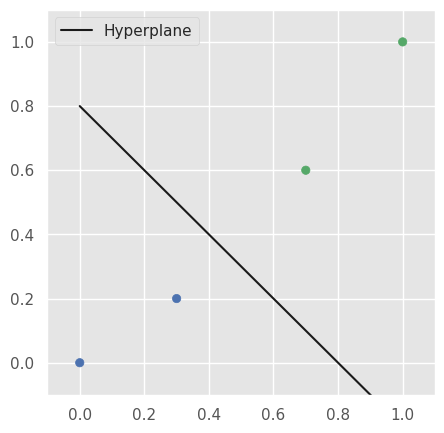

In [ ]:
xx = np.linspace(0, 1.5, 50)
yy = w * xx + b

plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(x[:, 0], x[:,1], 
            color=setcolor(pd.Series(y)) )
plt.scatter(test_data[:, 0], test_data[:,1], 
            color=setcolor(pd.Series(pred)) )
plt.legend()
plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()